# Importing Required Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset

**Source**: Malaria in Africa dataset by Lydia70, hosted on Kaggle.

Link: `https://www.kaggle.com/datasets/lydia70/malaria-in-africa`

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

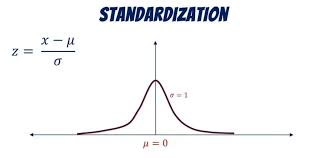


In [2]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

df = pd.read_csv("DatasetAfricaMalaria.csv")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

encoded_df = encoded_df.fillna(encoded_df.mean(numeric_only=True))

feature_names = encoded_df.columns.tolist()
x_train = encoded_df.astype(np.float64).to_numpy()

feature_means = np.mean(x_train, axis=0)
feature_stds = np.std(x_train, axis=0, ddof=1)
feature_stds[feature_stds == 0] = 1.0

standardized_data = (x_train - feature_means) / feature_stds

standardized_data[:5]

array([[-1.57980734e+00, -1.21154348e+00, -5.06333477e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.55157945e-16,  0.00000000e+00,  5.41437140e-16,
        -1.20234269e+00,  1.84222270e+00, -1.45590163e+00,
        -1.23296180e+00, -1.66668632e+00,  1.23293357e+00,
        -5.61173916e-01,  1.49369219e+00,  1.86085549e+00,
         1.15703067e+00,  1.77216327e+00,  2.08173504e+00,
         1.99620601e+00,  1.60764941e+00, -7.82531748e-01,
         7.27397927e+00, -1.37244892e-01, -1.37244892e-01,
        -1.37244892e-01, -1.37244892e-01, -1.37244892e-01,
        -1.37244892e-01, -1.37244892e-01, -1.37244892e-01,
        -1.37244892e-01, -1.37244892e-01, -1.37244892e-01,
        -1.37244892e-01, -1.37244892e-01, -1.37244892e-01,
        -1.37244892e-01, -1.37244892e-01, -1.37244892e-01,
        -1.37244892e-01, -1.37244892e-01, -1.37244892e-01,
        -1.37244892e-01, -1.37244892e-01, -1.37244892e-01,
        -1.37244892e-01, -1.37244892e-01, -1.37244892e-0

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [3]:
# Step 3: Calculate the Covariance Matrix
# We treat each column as a feature (rowvar=False)
cov_matrix = np.cov(standardized_data, rowvar=False, bias=False)
cov_matrix

array([[ 1.00000000e+00, -6.79397111e-02,  3.57344598e-01, ...,
         1.87221421e-19, -1.87221421e-19,  1.87221421e-19],
       [-6.79397111e-02,  1.00000000e+00,  2.88508868e-01, ...,
        -8.72221747e-02,  1.93058068e-01,  1.65630924e-01],
       [ 3.57344598e-01,  2.88508868e-01,  1.00000000e+00, ...,
         2.67447424e-02, -1.87887547e-02, -4.24783905e-02],
       ...,
       [ 1.87221421e-19, -8.72221747e-02,  2.67447424e-02, ...,
         1.00000000e+00, -1.88679245e-02, -1.88679245e-02],
       [-1.87221421e-19,  1.93058068e-01, -1.87887547e-02, ...,
        -1.88679245e-02,  1.00000000e+00, -1.88679245e-02],
       [ 1.87221421e-19,  1.65630924e-01, -4.24783905e-02, ...,
        -1.88679245e-02, -1.88679245e-02,  1.00000000e+00]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [4]:
# Step 4: Perform Eigendecomposition
# Since the covariance matrix is symmetric, use eigh
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
eigenvalues, eigenvectors

(array([-7.69119729e-15, -4.73533328e-15, -3.31844934e-15, -2.55164893e-15,
        -2.18637959e-15, -1.87988410e-15, -1.76177414e-15, -1.63658298e-15,
        -1.62901624e-15, -1.52657326e-15, -1.51412283e-15, -1.43191708e-15,
        -1.36300001e-15, -1.35635180e-15, -1.27951596e-15, -1.18863041e-15,
        -1.14546901e-15, -1.03674058e-15, -1.03226370e-15, -9.44643929e-16,
        -9.42786716e-16, -9.32351698e-16, -9.14316498e-16, -8.69741127e-16,
        -8.31325167e-16, -8.27748302e-16, -7.74806979e-16, -7.26449213e-16,
        -6.61412218e-16, -6.55557993e-16, -6.36710121e-16, -6.30004316e-16,
        -6.12918299e-16, -5.46033111e-16, -5.21286921e-16, -4.92182905e-16,
        -4.80738330e-16, -4.65010981e-16, -3.75969941e-16, -3.75087461e-16,
        -3.58227141e-16, -3.38003456e-16, -3.25402849e-16, -3.16053611e-16,
        -3.03949180e-16, -3.00461785e-16, -2.99075907e-16, -2.08033136e-16,
        -2.05974242e-16, -2.00035465e-16, -1.92372278e-16, -1.74275298e-16,
        -1.6

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [5]:
# Step 5: Sort Principal Components

# 1. The eigenvalues tell us how much variance each principal component explains.
# We want to sort the components from the one that explains the MOST variance
# to the one that explains the LEAST variance.

# np.argsort(eigenvalues) gives us the indices that would sort the eigenvalues from smallest to largest (ascending order).
# By adding [::-1], we reverse that order to get largest to smallest instead.
sorted_indices = np.argsort(eigenvalues)[::-1]

# 2. Now we use these indices to reorder both:
# - the eigenvalues themselves
# - the eigenvectors (columns of the eigenvector matrix)

# This is important because each eigenvalue is paired with one eigenvector.
# If we shuffle one, we must shuffle the other in the same way.
sorted_eigenvalues = eigenvalues[sorted_indices]        # This is a 1D array - it represents the eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]   # This is a 2D array - The columns of this matrix are the principal directions

# 3. Compute explained variance and cumulative explained variance.
# total_variance:
# - Sum of all eigenvalues.
# - Represents the total variance present in the data.
#
# explained_variance_ratio:
# - Each entry k is: eigenvalue_k / total_variance.
# - This tells us what fraction (or percentage) of the total variance
#   is explained by the k-th principal component.
#
# cumulative_explained_variance:
# - Cumulative sum of explained_variance_ratio.
# - Entry k tells us how much variance is explained by the FIRST (k+1) components together.
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 4. Finally, we output the sorted eigenvectors (principal components).

sorted_eigenvectors

array([[ 2.10393666e-02,  2.67851378e-03, -1.86486201e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.59843625e-01,  1.02222997e-01, -1.30679602e-01, ...,
        -3.94695549e-14, -9.45615491e-15, -6.16783272e-14],
       [-9.32705353e-02, -3.57554665e-02, -6.70954642e-02, ...,
        -7.73254151e-15, -3.85741445e-17, -7.04752659e-15],
       ...,
       [-7.44191093e-02, -7.97711276e-02,  1.05730113e-02, ...,
         8.36547266e-02, -1.03627926e-01, -2.32240456e-02],
       [-2.25325381e-02,  4.53606488e-02, -4.10238261e-02, ...,
         1.54704770e-02,  2.55818727e-02, -1.03812102e-01],
       [-1.84062631e-02,  3.02554305e-02, -3.70493435e-02, ...,
        -1.01561513e-02,  1.34384858e-02, -9.03607209e-02]])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [6]:
# Step 6: Project Data onto Principal Components

# 1. Decide how many principal components to keep.
# We don't want choose this number manually. Instead, we use the 
# cumulative_explained_variance array from Step 5.

# 1a. We set variance_threshold = 0.95, this means the following:
# We want to keep enough components so that together they explain
# at least 95% of the total variance in the data.
variance_threshold = 0.95

# We know that cumulative_explained_variance is a 1D array where:
# - cumulative_explained_variance[0] = variance explained by PC1
# - cumulative_explained_variance[1] = variance explained by PC1 + PC2
# - cumulative_explained_variance[2] = variance explained by PC1 + PC2 + PC3
# - cumulative_explained_variance[k] = variance explained by sum(PC1 ... PC[k + 1])


# So we look for the first index `k` where the cumulative explained variance is >= 0.95. 
# np.argmax returns the index of the first True.
num_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1

# 2. Build the projection matrix using the top `num_components` eigenvectors.
# - sorted_eigenvectors has all principal directions as columns.
# - We take only the first `num_components` columns (the most important ones).
projection_matrix = sorted_eigenvectors[:, :num_components]

# 3. Project (transform) our standardized data into the new PCA space.
# - standardized_data has shape (n_samples, n_features).
# - projection_matrix has shape (n_features, num_components).
# - The matrix multiplication gives reduced_data with shape (n_samples, num_components).

# Each row in reduced_data is the original observation expressed
# in terms of the principal components instead of the original features.
reduced_data = np.dot(standardized_data, projection_matrix)

# 4. Look at the first few rows of the reduced data to see what it looks like.
reduced_data[:5]

array([[ 5.09598186,  3.34907439,  3.50224548,  1.54737082, -3.53707291,
         1.52455045,  3.5829584 , -0.28713685, -0.58920554,  0.8357471 ,
         0.52788319,  0.35814032,  0.20093675, -0.9433447 ,  2.86422791,
        -1.42028959, -2.11680631, -1.05259621,  2.5921758 ,  3.09402363,
        -0.26114318, -2.17499975,  0.33187827,  0.52840252,  2.60327889,
         0.6948226 , -0.76079472, -2.13191062, -0.79978131, -0.17797921,
        -2.63654949,  1.12140926,  0.24671314, -0.53892515,  2.73792181,
        -0.47543206, -0.77972917,  0.72117006, -1.82207506, -1.63173457,
         2.24197132, -1.81439404,  2.01185959,  0.24733721,  2.06173172,
        -1.10291531, -0.46669663, -0.10427416, -2.14582874,  2.43659415,
         0.8561344 ,  3.4931952 ],
       [-1.57346708,  1.26254163, -0.58192945, -1.0449549 ,  3.48559061,
         3.22398803,  0.63032578,  2.14287653, -1.82094515, -2.7595328 ,
         0.52659459,  1.22581371, -0.72170295,  2.09675091, -0.39099769,
         3.20554

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [7]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (594, 52)


array([[ 5.09598186,  3.34907439,  3.50224548,  1.54737082, -3.53707291,
         1.52455045,  3.5829584 , -0.28713685, -0.58920554,  0.8357471 ,
         0.52788319,  0.35814032,  0.20093675, -0.9433447 ,  2.86422791,
        -1.42028959, -2.11680631, -1.05259621,  2.5921758 ,  3.09402363,
        -0.26114318, -2.17499975,  0.33187827,  0.52840252,  2.60327889,
         0.6948226 , -0.76079472, -2.13191062, -0.79978131, -0.17797921,
        -2.63654949,  1.12140926,  0.24671314, -0.53892515,  2.73792181,
        -0.47543206, -0.77972917,  0.72117006, -1.82207506, -1.63173457,
         2.24197132, -1.81439404,  2.01185959,  0.24733721,  2.06173172,
        -1.10291531, -0.46669663, -0.10427416, -2.14582874,  2.43659415,
         0.8561344 ,  3.4931952 ],
       [-1.57346708,  1.26254163, -0.58192945, -1.0449549 ,  3.48559061,
         3.22398803,  0.63032578,  2.14287653, -1.82094515, -2.7595328 ,
         0.52659459,  1.22581371, -0.72170295,  2.09675091, -0.39099769,
         3.20554

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

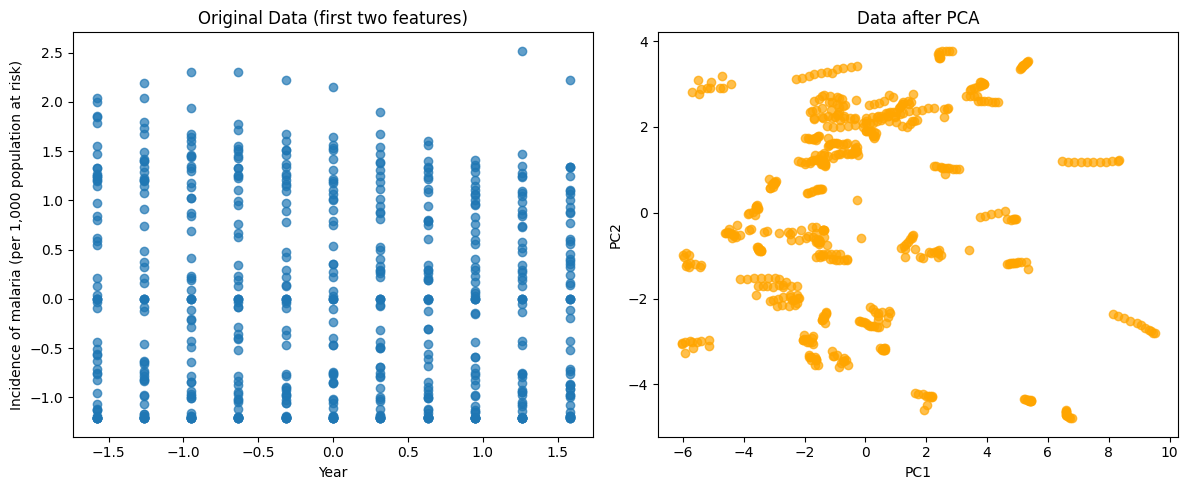

In [8]:
# Step 8: Visualize Before and After PCA

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.7)
plt.title('Original Data (first two features)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, color='orange')
plt.title('Data after PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()
